# STATISTICS: GROUP 019_AMG: ACSAI 2021-2022
### Homework 02:
### (A)lessio Borgi         1952442
### (M)artina Doku          1938629
### (G)iuseppina Iannotti   1938436

In [1]:
import yfinance as yf                                       #We will use this in the second exercise for downloading the Financial Data.
import numpy as np                                          #We will use this throughout the whole homework for manipulating Data.
import matplotlib.pyplot as plt                             #We will make use of this for plotting some of the Histograms and their Relative Distribution.
import plotly.graph_objects as go                           #We will use this for doing, mostrly in the second exercise, plots of the Financial Data.
from plotly.subplots import make_subplots                   #We will use this for making subplots.
import seaborn as sb                                        #We will use this always as a visualization tool.
from scipy import stats as st                               #We will use ths for the Fitting mostly in the Parametric Bootstrap.
import statsmodels.api as stmod                             #We will use this during the first exercise.
import pandas as pd                                         #We will use this to import Data in the first exercise.

## Exercise 01: Deja vu

#### TASK:
For $\theta > 0$, let $\{X_1,\ldots,X_n\}$ be IID from the following parametric *density*:

$$
f(x\,|\,\theta) = \frac{\theta^2}{x^3} \cdot \mathrm{e}^{-\tfrac{\theta}{x}}  \quad \text{for} \quad x \geqslant 0, 
$$

having mean $\mathbb{E}(X) = \frac{\theta}{2}$ and variance $\mathbb{V}\text{ar}(X) = \frac{\theta^2}{4}$.

#### TO DO:

1. Find the maximum likelihood *estimator* for $\theta$ and then evaluate the maximum likelihood *estimate* on the `Wind` variable of the `airquality` dataset we used in class. <br>
 Is it a good fit? Briefly explain your answer by looking at some basic plots and stats.
 
2. Use the properties and asymptotics of MLE to get an estimate of the *average* wind speed together with a quatification of the estimator standard error.

3. Compare the previous result with what a **Nonparametric** Bootstrap solution for the same population parameter (i.e. the population mean).

4. [`Bonus`] Are you also able to implement (and compare) a **Parametric** Bootstrap solution for the sample problem? Explain.

## 1.1: FIND THE MAXIMUM LIKELIHOOD ESTIMATOR FOR $\theta$ AND EVALUATE IT ON "WIND":

In order to do this part, we will have to first import the data of the Wind from our "airquality" dataset. Then, we can do some Data Visualization, in order to understand better the Distribution of the Data we have. We first Visualize the BoxPlot, then the Histogram, the ECDF Plot and the Kernel Density Plot. 

After drawing the PDF with the MLE as Parameter, we will notice that the fitting is very bad. Indeed we will have that the Density(orange line) is really far for tracking the Histogram Distribution.  

### 1.1.1: IMPORT THE DATASET:

In [2]:
df = pd.read_csv("airquality.csv", header = 0)      #Importing the Dataset "Airquality".
df

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


### 1.1.2: DATA VISUALIZATION OF WIND:

Text(0.5, 0, 'Wind (mph)')

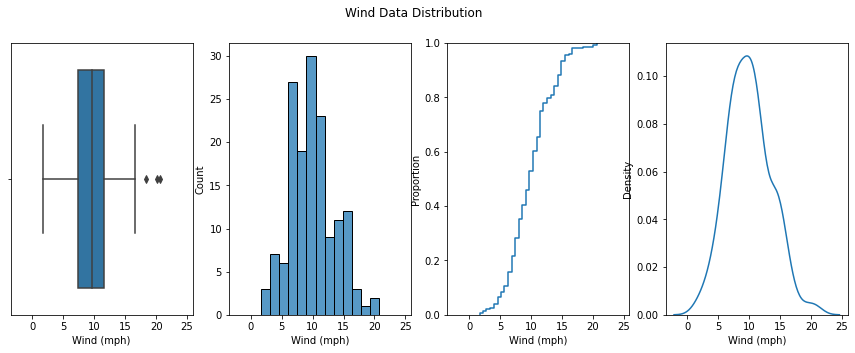

In [3]:
#CREATION OF A SUBPLOT:
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(15, 5), sharex=True)    #Here we create a 1x4 subplot. Note that the "sharex = True" has the role of scaling all the subplots with 
                                                                            #the same x-axis range in such a way to enhance comparability between subplots.
fig.suptitle('Wind Data Distribution ')                                     #Adding the Title to the whole set of Subplots.

#IMPLEMENTATION OF THE BOXPLOT:
sb.boxplot(data = df,  x = "Wind", ax = axes[0])                            #Here we create the BoxPlot(stripped version of an Histogram). As a small explanation let us say that it is 
                                                                            #divided in Empirical Quartiles(the Plug-in Estimator of the First Quartile, the Second Quartile(Median) and 
                                                                            #the Third Quartile). They are drawn in order: first, second and third quartile. 
                                                                            #The central part of the distribution, should cut off the most dense part of the distribution. The two bars at
                                                                            #the sides are called "multiple" of the InterQuartile Range(that is the distance between the first and third 
                                                                            #quartile(ones at the center)). Those, based on a Gaussian population, should give you the Normal part of the 
                                                                            #data. In the end, we have some points at the right of the BoxPlot, denoted as "Outliers". 
                                                                            #The central part cuts the 50% of your dataset(called the Normality Zone), whilst the external parts at the 
                                                                            #right and at the left are the "Abnormal Parts".
axes[0].set_xlabel('Wind (mph)')                                            #Let's position the BoxPlot at the first subplot.

#IMPLEMENTATION OF THE HISTPLOT:
sb.histplot(data = df, x = "Wind", ax = axes[1])                            #Implementation of the HIstogram for representing the Distribution of the Wind Data.
axes[1].set_xlabel('Wind (mph)')                                            #Let's position the Histogram at the second subplot.

#IMPLEMENTATION OF THE ECDFPLOT:
sb.ecdfplot(data = df, x = "Wind", ax = axes[2])                            #Implementation of the EMpirical CDF Plot for representing the Distribution of the Wind Data.
axes[2].set_xlabel('Wind (mph)')                                            #Let's position the EmpiricalCDF Plot at the third subplot.

#IMPLEMENTATION OF THE KDEPLOOT:
sb.kdeplot(data = df,  x = "Wind", ax = axes[3])                            #Kernel Plot(sort of smoothed Histogram) for representing the Distribution of the Wind Data.
axes[3].set_xlabel('Wind (mph)')                                            #Let's position the Kernel Density PLot at the fourth subplot.

### 1.1.3: SUPERIMPOSE THE KERNEL DENSITY TO THE HISTOGRAM:
Here we will compare the Histogram with the Kernel Density. Notice that the scales are different. Indeed, Histogram is based on "counts per bin" whilst the Kernel has directly the Density.
There are two ways of superimposing Kernel Density to the Histogram: to force the histogram to be a density, or you can use, through the "histplot" function, the parameter "kde", that when it is equal to 1, will also add a Density Plot scaled on the scale of the Histogram itself.

<AxesSubplot:xlabel='Wind', ylabel='Count'>

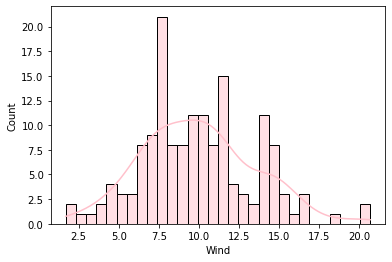

In [4]:
sb.histplot(data = df, x = "Wind", kde=1,color="pink", bins=30)     #Superimpose the Kernel Density to the Histogram Density.

### 1.1.4: EVALUATION OF THE MXIMUM LIKELIHOOD ESTIMATE:
Here we evaluate the Maximum Likelihood Estimate on the "Wind" variable of the Airquality dataset. We first select the "Wind" column and then we will apply compute simply the MLE for every element in the "Wind" column, computing it basing on the pdf we are given.

The Maximum Likelihood Estiamation is:  16.8841959926002


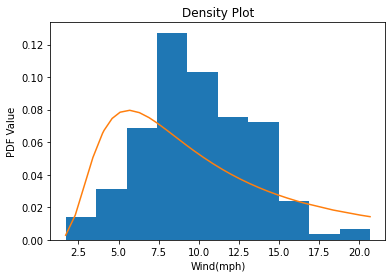

In [5]:
#SELECTING "WIND":
wind = df["Wind"]                               #Selecting the column "Wind" in such a way to focus only on it
wind=wind.sort_values()                         #Sorting out the values in "Wind".             

#COMPUTING THE MLE:
somma = np.sum(1/wind)  #broadcasting           #we compute the sum of all 1/xi's (values of wind) using broadcasting
#print('somma',somma)
leng = len(wind)                                #the length of wind corresponds to the "n" in the formula 
#print('leng',leng)
MLE = 2*leng / somma                            #We compute the MLE of "Wind" by using the formula we've found on paper.
print("The Maximum Likelihood Estiamation is: ", MLE)


#DEFINITION OF THE PDF:
def pdf (x,theta):                              #We define the pdf we are given as a function
    pdf=((theta**2)/(x**3))*np.exp(-(theta/x))
    return pdf

#CREATION OF AN ARRAY MLE:
MLE_y=[]                                        #Definition of a MLE Array.
for el in wind:                                 #Looping over the loop of the wind array of samples.
    MLE_y.append(pdf(el, MLE))                  #Calculating the density with our function 'pdf' we've defined using the theta obtained with ML estimation.
MLE_y=np.array(MLE_y)                           #Converting the array in a NumPy array.

#PLOTTING:
plt.hist(wind, density=True)                    #Plotting out the Histogram representing the Wind Distribution.
plt.title("Density Plot")                       #Insertion of the title in the Plot.
plt.xlabel("Wind(mph)")                         #Insertion of the x-axis' label in the Plot.
plt.ylabel("PDF Value")                         #Insertion of the y-axis' label in the Plot.
plt.plot(wind, MLE_y, label='MLE')              #Plotting the MLE.

## 1.2: GET AN ESTIMATE OF THE *AVERAGE* WIND SPEED AND A QUANTIFICATION OF THE STANDARD ERROR:
### 1.2.1 MEAN:

Our parameter of interest $\tau$ is indeed the average wind speed $\mathbb{E}(X)$. <br>
It is a function of the "technical" parameter $\boldsymbol{\theta}$:
$$\tau = \mathbb{E}(X) = h(\boldsymbol{\theta}) = (\frac{\boldsymbol{\theta}}{2})$$
Hence, by the *equivariance* of MLE, we know that
$$\widehat{\tau}{\tt ML} = h\big( \widehat{\boldsymbol{\theta}}{\tt ML}\big) = (\frac{\widehat{\boldsymbol{\theta}}_{\tt ML}}{2})$$

### 1.2.2: STANDARD ERROR:

To compute the standard error instead we will have to do:

If ${\text(X_{\tt 1},X_{\tt 2},\ldots,X_{\tt n})}$ are IID as $f(x\,|\,\theta)$, then the Fisher 
information is defined to be $I_{\tt n}(\boldsymbol{\theta}) = n* I(\boldsymbol{\theta})$ with:

$I(\boldsymbol{\theta})= - \mathbb{E}(\frac{\partial^2 }{\partial \boldsymbol{\theta}^2} \space(\space\log\space(\frac{\boldsymbol{\theta}^2}{x^3} \space e^{-\frac{\theta}{x}}\space)))=\mathbb{E}(\frac{2}{\boldsymbol{\theta}^2})=\frac{2}{\boldsymbol{\theta}^2}$

Let $\widehat{\boldsymbol{\theta}}_{\tt n}$ denotes the mle for $\boldsymbol{\theta}$ and 
${\text{se} = \sqrt{\mathrm{Var}(\widehat{\boldsymbol{\theta}}_{\tt n})}}$.

For large samples, the sampling distribution of $\widehat{\boldsymbol{\theta}}_{\tt n}$  can be
approximated by a Normal with mean $\boldsymbol{\theta}$ and variance ${\text{se}^2}$. In addition, the asymptotic ${\text{se}^2}$ can be approximated by: $\space{\text{se}}\approx[I_{\tt n}({\boldsymbol{\theta}})]^{-\frac{1}{2}}$


Since $I_{\tt n}(\boldsymbol{\theta})$ depends on the unknown ${\boldsymbol{\theta}}$, it can be shown that the previous result still holds if we estimate the ${\text{se}}$ by plugging $\widehat{\boldsymbol{\theta}}{\tt n}$ in the definition of $I{\tt n}(\boldsymbol{\theta})$

That is, $\widehat{\boldsymbol{\theta}}_{\tt n}\approx{\text{N}(\boldsymbol(\theta),\widehat{\text{se}})}$, where: 


$$\widehat{\text{se}}\approx[I_{\tt n}(\widehat{\boldsymbol{\theta}}_{\tt n})]^{-\frac{1}{2}}$$


In [6]:
# CALCULATING THE MEAN:  
average=MLE/2                                           #We use the expectation formula given from the excercise text, using the MLE as parameter value.

#FIRST DERIVATIVE OF THE LOG OF THE DENSITY:
def der1_log (theta,x):                                 #We define the derivative function with parameter theta and x.
    der1_log=2/theta-1/x
    return der1_log

#SECOND DERIVATIVE OF THE LOG OF THE DENSITY:
def der2_log(theta):                                    #We define the second derivative taking only parameter theta as x disappeared with the second derivation.
    return -2/theta**2     

#COMPUTING THE FISHER INFORMATION:
length = len(wind)                                      #Computing the length of the our Datasent. (It will correspond to our "n")        
fisher_info= - der2_log(MLE)*length                     #We obtain fisher information as: minus the expecation of the second derivative. Since the variable x disappeared, 
                                                        #the expectation is performed over a constant so it is equal to the constant itself. 
                                                        #Hence, the fisher info is stated to be equal to minus the second derivative computed with the MLE as parameter.

#STANDARD ERROR
se=np.sqrt(fisher_info)                                 #The standard error is computed as the square root of the fisher info.
print('The Mean is equal to:', average)                 #Print out the Mean.
print('The Standard Error is', se)                      #Print out the Standard Error.

The Mean is equal to: 8.4420979963001
The Standard Error is 1.0360490776227933


## 1.3: COMPARE THE PREVIOUS RESULT WITH A **NON-PARAMETRIC BOOTSTRAP**:

Here we compute the Non-Parametric Bootstrap solution for the population mean and we will compare it with the previous result (that is, the average wind speed obtained in the previous point).

The Bootstrapping Estimation of the Mean is:  9.958343790849675


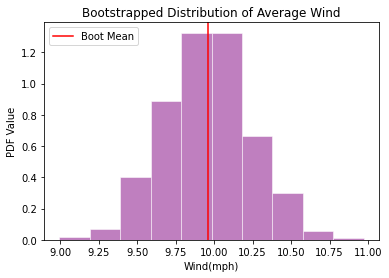

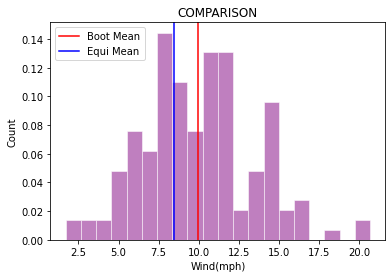

In [7]:
#NON-PARAMETRIC BOOTSTRAPPED DISTRIBUTION: 
np.random.seed(0)                                               #We fix the seed to abtain a specific random sampling.
B = 1000                                                        #We chose the length of our boot_stat length.
boot_stat = np.zeros(B)                                         #We initialize our boot_stat as an array filled with zeros.
for b in range(B):                                              #We replace each of those zeros computing, for each of them:
    x_boot       = wind.sample(n = len(wind), replace = True)   #1) a vector with samples from our interest values (with replacement).
    boot_stat[b] = x_boot.mean()                                #2) the mean of that vector, that is inserted in boot_stat.
    

#BOOTSTRAPPING ESTIMATION OF THE MEAN: 
non_parametric_b_mean= boot_stat.mean()                                                 #Given our boot_stat distribution we extract the mean.


#1-st PLOT: PLOTTING OUR BOOTSTRAPPED DISTRIBUTION: 
plt.hist(boot_stat, density = 1, facecolor='purple', edgecolor = 'white', alpha=0.5)    #Plotting our Bootstrapped Distribution.
plt.axvline(x = boot_stat.mean(), color = 'red', label = 'Boot Mean')                   #Inserting the Mean of the Distribution.
plt.title("Bootstrapped Distribution of Average Wind")                                  #Insertion of the title in the Plot.
plt.xlabel("Wind(mph)")                                                                 #Insertion of the x-axis' label in the Plot.
plt.ylabel("PDF Value")                                                                 #Insertion of the y-axis' label in the Plot.
plt.legend(loc="upper left")                                                            #Insertion of the legend in the Plot. 
print("The Bootstrapping Estimation of the Mean is: ", boot_stat.mean())                #Print out the Mean.
plt.show()                                                                              #Showing the plot.

#2-nd PLOT: COMPARING "average" (ESTIMATE AVERAGE WIND SPEED) WITH THE NON-PARAMETRIC BOOTSTRAP RESULT FOR THE MEAN
plt.hist(wind,bins=20, density = 1, facecolor='purple', edgecolor = 'white', alpha=0.5) #Plotting "Wind" and then,comparing the two obtained results. 
plt.axvline(x = boot_stat.mean(), color = 'red', label = 'Boot Mean')                   #Adding the Mean found with the Bootstrap
plt.axvline(x = average, color = 'blue', label = 'Equi Mean')                           #Adding the Estimate average wind speed.                       
plt.title("COMPARISON")                                                                 #Inserting the Title in the plot.
plt.xlabel("Wind(mph)")                                                                 #Insertion of the 'x-axis' label in the Plot.
plt.ylabel("Count")                                                                     #Insertion of the 'y-axis' label in the Plot.
plt.legend(loc="upper left")                                                            #Inserting the y label.
plt.show()                                                                              #Showing the plot.

## 1.4: [BONUS] IMPLEMENT A **PARAMETRIC BOOTSTRAP**:
In this part we will develop a Parametric Bootstrap in order to compare it then with the two results found before. For the Boostrapped Version, we opt for the "skewnormal Distribution". We apply it to the real Distribution of the Wind Data.

We will have to draw the Distribution and then to superimpose the SkewNormal Distribution and we see that it fits quite well in the plot. We then test the way in which skewnormal fits or data, by drawing a **Quantile-Quantile-Plot(QQ-Plot)**. We are ale to interpret it as follows: we know that if the bottom end of the Q-Q plot deviates from the straight line but the upper end is not, then we can clearly say that the distribution has a longer tail to its left or simply it is left-skewed (or negatively skewed) but when we see the upper end of the Q-Q plot to deviate from the straight line and the lower and follows a straight line then the curve has a longer till to its right and it is right-skewed (or positively skewed).

### 1.4.1 COMPUTING THE PARAMETRIC BOOTSTRAP SOLUTION FOR THE POPULATION MEAN:

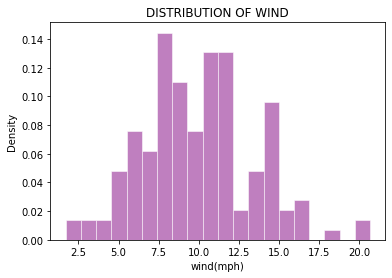

hat_a 1.745027305757242 hat_loc 6.582908791834057 hat_scale 4.8701378817631475
1.745027305757242 6.582908791834057 4.8701378817631475


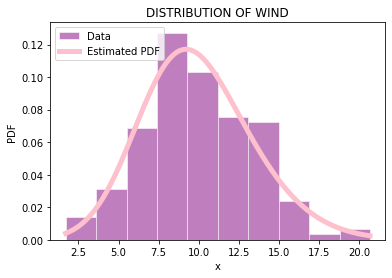

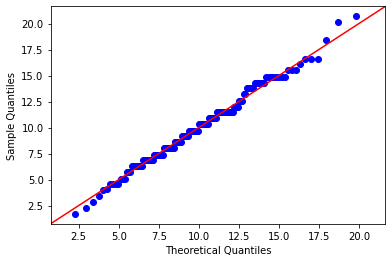

In [8]:
#PLOTTING THE DISTRIBUTION:
plt.hist(wind, density = 1, facecolor='purple', edgecolor = 'white', alpha=0.5, bins = 20)  #We plot wind as an Histogram Distribution.
plt.title("DISTRIBUTION OF WIND")                                                           #Insertion of the title in the Plot.                                                               .
plt.xlabel('wind(mph)')                                                                     #We add up the x-axis label.
plt.ylabel('Density')                                                                       #We add up the y-axis label.
plt.show()                                                                                  #We show the plot.

#MLE DEFAULT METHOD:
hat_a, hat_loc, hat_scale = st.skewnorm.fit(wind)                    
print('hat_a',hat_a,'hat_loc',hat_loc,'hat_scale',hat_scale)                                #We obtain the  actual parameters of the skewnorm distribution using the fit.
print(hat_a, hat_loc, hat_scale)                                                            #We print out the three parameters of our new log distribution under a skewnorm model.

#PDF OF THE SKEWNORM DISTRIBUTION:
rv_fit  = st.skewnorm(a = hat_a, loc = hat_loc, scale = hat_scale)                          #We create the distribution with previously found parameters.
v_grid  = np.linspace(wind.min(), wind.max(), num = 501)                                    #Found parameters.      
pdf_val = rv_fit.pdf(v_grid)                                                                #We call the pdf function over it and assign that to the variable 'pdf_val'.
#fitted model 

#1-st PLOT: WIND DISTRIBUTION:
                           
plt.hist(wind, density = 1, facecolor='purple', edgecolor = 'white', alpha=0.5, label = "Data") #Plotting our Histogram Distribution.
plt.plot(v_grid, pdf_val, '#fdc0cc', linewidth = 5,label = "Estimated PDF")                     #Plotting our our Estimated PDF.
plt.title("DISTRIBUTION OF WIND")                                                               #Insertion of the title in the Plot.   
plt.xlabel('x')                                                                                 #We add up the x-axis label.
plt.ylabel('PDF')                                                                               #We add up the y-axis label.
plt.legend(loc='upper left')                                                                    #We add up the Legend of the plot.
plt.show()                                                                                      #We show up the plot.

# 2nd PLOT: THE SKEWNORMAL PDF OVER OUR DISTRIBUTION FIT: QUANTILE-QUANTILE-Plot(QQ-Plot):
stmod.qqplot(data = wind, dist = st.skewnorm(hat_a, hat_loc, hat_scale), line='45', fmt='b')    #Let's buiild up a QQ-Plot to see how the SkewNormal Distribution fits ours.
plt.show()                                                                                      #Show the qqplt.

In [9]:
# Estimated mean and variance
# By the MLE equivariance, these ARE the MLEs for these two population quantities
rv_fit.stats()

(array(9.95436734), array(12.35151023))

Assume (again) that the parameter of interest $\tau$ is indeed the population mean $\mathbb{E}(X)$. <br>
It is a function of the "technical" parameter $\boldsymbol{\theta} = (\mathrm{loc},\mathrm{scale},\mathrm{shape})$:
$$\tau = \mathbb{E}(X) = h(\boldsymbol{\theta}) = \mathrm{loc} + \mathrm{scale}\times\delta\times\sqrt{\frac{\pi}{2}}$$  
where $$\delta = \frac{\mathrm{shape}}{\sqrt{1+{\mathrm{shape}^2}}}$$
Hence, by the **equivariance** of MLE, we know that
$$\widehat{\tau}_{\tt ML} = h\big( \widehat{\boldsymbol{\theta}}_{\tt ML}\big) = \widehat{\mathrm{loc}}_{\tt ML}+\widehat{\mathrm{scale}_{\tt ML}}\times\widehat{\delta}_{\tt ML}\times\sqrt{\frac{\pi}{2}} $$
In fact,

In [10]:
#We are writing hat_a,hat_loc,hat_scale in terms of delta,epsilon,
#omega according to the paramters of the skew normal distribution (just for simplicity) 
epsilon = hat_loc                       #it represents the shifting parameter of the skew-normal distribution
omega = hat_scale                       #it represents how much the distribution is spread (The larger the scale parameter, the more spread out the distribution.) 
delta = hat_a / np.sqrt(1+(hat_a)**2)   #it must affect the shape of a distribution rather than simply shifting it (as a location parameter does) or stretching/shrinking it (as a scale parameter does).
hat_tau = epsilon + omega*delta*(np.sqrt(2/np.pi))   #we compute the estimated value of the population mean,by using the equivariance of the MLE.
print(hat_tau)                                       #we print it out

9.954367342486325


In [11]:
#PARAMETRIC BOOTSTRAPPED SOLUTION 
np.random.seed(0)                                               #We fix the seed to allow reproducibility.
B = 500                                                         #Size of the bootstrap
boot_stat = np.zeros(B)  
for b in range(B):                                              #We initialize our boot_stat as an array filled with zeros.
    x_bt = rv_fit.rvs(len(wind))                                # sample for the fitted population
    a_bt, loc_bt, scale_bt = st.skewnorm.fit(x_bt)              # obtain the bootstrap replicates of the MLEs
    eps_bt = loc_bt                                             #we write a_bt,loc_bt,scale_bt in terms of delta_bt,eps_bt,omega_bt just for simplicity (same as before)
    omega_bt = scale_bt
    delta_bt = a_bt / np.sqrt(1+(a_bt)**2) 
    boot_stat[b]  = eps_bt + omega_bt*delta_bt*(np.sqrt(2/np.pi))  #use equivariance to get the bootstrap replicates for the MLEs of the parameter of interest

#BOOTSTRAPPING ESTIMATION OF THE MEAN: 
parametric_b_mean = boot_stat.mean()                                                #Given our boot_stat distribution we extract the mean.

print(parametric_b_mean)

9.953985810281866


### 1.4.2. COMPARISON BETWEEN THE AVERAGE,NON PARAMETRIC AND PARAMETRIC BOOTSTRAP SOLUTIONS:

We compare the results obtained in 1.2,1.3,1.4 paragraphs.

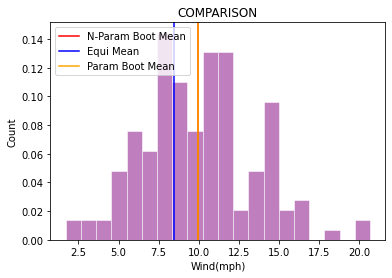

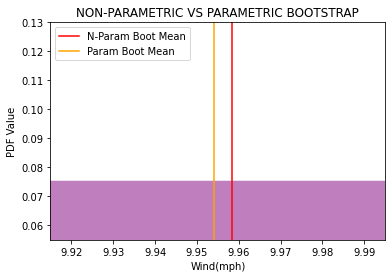

In [12]:
#PLOT: COMPARING "average" (ESTIMATE AVERAGE WIND SPEED) WITH THE NON-PARAMETRIC BOOTSTRAP RESULT FOR THE MEAN
plt.hist(wind,bins=20, density = 1, facecolor='purple', edgecolor = 'white', alpha=0.5)  #Plotting "Wind" and then,comparing the two obtained results. 
plt.axvline(x = non_parametric_b_mean, color = 'red', label = 'N-Param Boot Mean')       #Adding the Mean found with the Non Parametric Bootstrap
plt.axvline(x = average, color = 'blue', label = 'Equi Mean')                            #Adding the Estimate average wind speed.                       
plt.axvline(x = parametric_b_mean, color = 'orange', label = 'Param Boot Mean')          #Adding the Mean found with the Parametric Bootstrap
plt.title("COMPARISON")
plt.xlabel("Wind(mph)")                                                                  #Insertion of the 'x-axis' label in the Plot.
plt.ylabel("Count")                                                                      #Insertion of the 'y-axis' label in the Plot.
plt.legend(loc="upper left")
plt.show()                                                                               #Showing the plot.

#ZOOM IN IN THE AREA OF INTEREST: NON-PARAMETRIC VS PARAMETRIC BOOTSTRAP: 
plt.hist(wind,bins=20, density = 1, facecolor='purple', edgecolor = 'white', alpha=0.5)  #Plotting "Wind" and then,comparing the two obtained results. 
plt.axvline(x = non_parametric_b_mean, color = 'red', label = 'N-Param Boot Mean')       #Adding the Mean found with the Non Parametric Bootstrap
plt.axvline(x = parametric_b_mean, color = 'orange', label = 'Param Boot Mean')          #Adding the Mean found with the Parametric Bootstrap
plt.xlim(9.915, 9.995)                                                                   #Inserting the lower and upper bound in which we are interested in the x axis(where most of the MLE
                                                                                         #concentrates).
plt.ylim(0.055, 0.13)                                                                    #Inserting the lower and upper bound in which we are interested in the y axis(where most of the MLE
                                                                                         #concentrates).
plt.title("NON-PARAMETRIC VS PARAMETRIC BOOTSTRAP")                                   #Insertion of the title in the Plot.
plt.xlabel("Wind(mph)")                                                                  #Insertion of the x-axis' label in the Plot.
plt.ylabel("PDF Value")                                                                  #Insertion of the y-axis' label in the Plot.
plt.legend(loc="upper left")  
plt.show()












# Exercise 02: Toy Portfolio

#### TASK:
Suppose that we have two random variables $X$ and $Y$ which represent the yields of two financial assets. 

We will invest a fraction of our money, say $\omega$, in $X$ and the remaining fraction $(1 - \omega)$ in $Y$.

Our yield will hence be
$$
\omega \cdot X + (1 - \omega) \cdot Y.
$$
Because this is a random quantity, we may want to choose $\omega$ to minimize the variance of our investment. <br>
One can show that the value of $\omega$ minimizing
$$
\mathbb{V}\text{ar}\big( \omega \cdot X + (1 - \omega) \cdot Y \big),
$$
is indeed
\begin{equation}

\omega^\star = \frac{\sigma^2_Y - \sigma_{X,Y}}{\sigma^2_X + \sigma^2_Y - 2\cdot \sigma_{X,Y}},
\end{equation} 
where $\sigma^2_X = \mathbb{V}\text{ar}(X)$, $\sigma^2_Y = \mathbb{V}\text{ar}(Y)$, $\sigma_{X,Y} = \mathbb{C}\text{ov}(X,Y)$.

Given a random sample $\big\{ (X_1,Y_1), \ldots, (X_n,Y_n)\big\}$ for the returns, we can compute the following plug-in estimator for $\omega^\star$
$$
\widehat{\omega} = \frac{ \widehat{\sigma}^2_Y - \widehat{\sigma}_{X,Y}}{\widehat{\sigma}^2_X + \widehat{\sigma}^2_Y - 2\cdot \widehat{\sigma}_{X,Y}},
$$
Note that even if we knew a parametric form (say bivariate normal) for the joint distribution of $X$ and $Y$, performing formal calculations involving $\widehat{\omega}$ would be difficult, because of the presence of sample estimates (sample variances and covariance) in its numerator and denominator.

As you can imagine, we can pull financial data into `Python` in many different ways
To get the stocks info you have to know (in advance) the symbol associated to that stock (e.g. `Apple Inc.`, `IBM`, etc.) in a particular market (e.g. `NYSE`, `NASDAQ`). You can easily obtain this from portals like [Yahoo! Finance](https://it.finance.yahoo.com/). 

#### TO DO:

1. Prove (analytically) that $\omega^\star$ in fact minimizes the volatility of your investment.

2. Pick two stocks, gather their returns/performance measure in `Python` over a 1 year long period of your choosing, and implement a **nonparametric bootstrap** scheme to get (approximate) estimates for the **standard error** and **MSE** of the plug-in estimator $\widehat{\omega}$.

## 2.1: VOLATILITY OF YOUR INVESTMENT:

##### TASK:
 Prove (analytically) that $\omega^\star$ in fact minimizes the volatility of your investment.

### 2.1.1: UNDERSTANDING AND VISUALIZATION OF THE DATA:
We first try to understand the data in a very deep way, in such a way to have a very detailed overview of our Data. 
#### IMPLEMENTATION APPROACH:

First of answering to the question, we individuate what are the meaning of the corresponding Data we will get from the Dataframe. After some researches and basing on our prior knowledge, we have individuated the following definitons:

- `Open`: It Indicates the Stock's value at the aperture of the Stock Market.

- `High`: It Indicates the Maximum stock's value(the positive peak) at the aperture of the Stock Market.

- `Low`: It Indicates the Minimum stock's value(the negative valley) at the closure of the Stock Market.

- `Close`: It Indicates the Stock's value at the closure of the Stock Market.

- `Adj Close`: It Indicates the adjustement of the closing price after the market is closed. (It can happen either because of a stock split or because of a dividend payout).

- `Volume`: It measures the number of a Stock's shares that are traded on a stock exchange in a day or a period of time.


In [13]:
# url: https://pypi.org/project/fix-yahoo-finance/
# Install
# pip install yfinance --upgrade --no-cache-dir

##### 2.1.1.1: DOWNLOADING DATA FOR TWO COMPANIES:

We, first of all, download Stock historical (2019, 1 year) price data of two of the main companies(belonging to the "Big 5 Tech" Companies): **Apple (AAPL)**, **Microsoft(MSFT)**. 

In [14]:
#DOWNLOADING DATA OF THE COMPANIES:
df = yf.download("MSFT AAPL", start="2019-01-01", end="2020-01-01", group_by="ticker") #Download Apple and Microsoft information regarding their stock information during the 2019.

#REFINEMENT OF THE TWO SUB-DATASETS:
df = df.iloc[1:]                        #In order to eliminate the first date, that regards the 2018-12-31, date that does not regard the period of time we're studying.

#SUB-DATASET APPLE:
aapl = df.AAPL                          #Saving in a variable apart all data regarding APPLE.                 

#SUB-DATASET MICROSOFT:
msft = df.MSFT                          #Saving in a variable apart all data regarding MICROSOFT.

[*********************100%***********************]  2 of 2 completed


##### 2.1.1.2: DATA VISUALIZATION OF THE TWO STOCKS: UNDERSTANDING THE BEHAVIOUR OF THE TWO STOCKS:
Let's first of all have a look at how the two Stocks behaves during the period of time we're interested in. Let's create a Plot in which both the two stocks are drawn for the period
we're considering.

In [15]:
#CREATION OF THE STOCK PLOT: APPLE & MICROSOFT: 
fig = go.Figure(data = go.Scatter(x=aapl.index,y=aapl['Close'], mode='lines+markers', name='AAPL'))     #Let's create a plot inserting all the Closing Information of APPLE. 
fig.add_trace(go.Scatter(x=msft.index,y=msft['Close'], mode='lines+markers', name='MSFT'))              #Let's add up to our data also the MICROSOFT Closing Information.
fig.update_layout(title="<b>APPLE-MICROSOFT STOCK PLOT (2019)</b>", xaxis_title="<b>1-year Period of Time</b>", yaxis_title="<b>Stock Value</b>")   #Let's adjust the plot by inserting x 
                                                                                                                                                    #and y labels, in addition to the 
                                                                                                                                                    #title.
fig.show()

#

##### 2.1.1.3: DATA VISUALIZATION OF THE TWO STOCKS: CANDLESTICK CHART:

We can now understand a little bit better the real Behaviour of our Stock, by using a chart in the **CandleStick** style. Instead of using the Scatter() plot and passing the ‘Close’ price to the y-axis, now we need to specify also each of ‘open’, ‘high’, ‘low’ and ‘close’. This Tecnique is a.k.a **OHLC Representation**.

With the Candlestick chart, we are also provided with another smaller chart at the bottom, a.k.a. **Range Slider**, and we can drag either side to zoom in/out on a certain area of the chart.

We will create two different Chart for the companies.

In [16]:
#MICROSOFT:

#CREATING SUBPLOT:
fig4 = make_subplots(specs=[[{"secondary_y": True}]])                       #Create a subplot for the Microsoft CandleStick Chart.
fig4.add_trace(go.Candlestick(x=msft.index, open=msft['Open'], high=msft['High'], low=msft['Low'], close=msft['Close'])) #Passing out all the information in order to create the "Candles".

#ADDING INFORMATION TO THE CHART:
fig4.update_layout(title_text="<b>MICROSOFT CANDLESTICK CHART</b>")         #Add figure title.
fig4.update_xaxes(title_text="<b>1-year Period of Time</b>")                #Set x-axis title
fig4.update_yaxes(title_text="<b>Stock Value</br>", secondary_y=False)      #Set y-axis title.
fig4.update_yaxes(title_text="<b>Volume Shares</b>", secondary_y=True)      #Set the Secondary y-axis title.
fig4.show()                                                                 #Show the Plot.


#APPLE:

#CREATING SUBPLOT:
fig5 = make_subplots(specs=[[{"secondary_y": True}]])                       #Create a subplot for the Apple CandleStick Chart.
fig5.add_trace(go.Candlestick(x=aapl.index, open=aapl['Open'], high=aapl['High'], low=aapl['Low'], close=aapl['Close'])) #Passing out all the information in order to create the "Candles".

#ADDING INFORMATION TO THE CHART:
fig5.update_layout(title_text="<b>APPLE CANDLESTICK CHART</b>")             #Add figure title.
fig5.update_xaxes(title_text="<b>1-year Period of Time</b>")                #Set x-axis title
fig5.update_yaxes(title_text="<b>Stock Value</br>", secondary_y=False)      #Set y-axis title.
fig5.update_yaxes(title_text="<b>Volume Shares</b>", secondary_y=True)      #Set the Secondary y-axis title.
fig5.show()                                                                 #Show the Plot.

##### 2.1.1.4: DATA VISUALIZATION OF THE TWO STOCKS: ADDING VOLUMES INFORMATION:

We know add up the **VOLUME** of the trading to our chart. To do this, we build up a subplot and a secondary_y axis for the volume data. The latter is done for allowing the Volume to depend on a completely different scale w.r.t. the stock price. It will, indeed depend on the amount of stocks traded in a day.


Although the volume data is on the secondary y-axis, some of the bars are way too long and covers the stock price graph. This is due to the fact that this two companies that we've chosen trade a tremendous amount of stocks during a day in the Stock Market (they are indeed both part of the 5 Big Tech). For this reason, we will zoom out a little bit the scale of the Volume bars by setting a range for the y-axis bigger, in such a way to obtain the bars that are more scaled out. 

For a better understanding, we will now create two different chart for the two Companies.


Pick two stocks, gather their returns/performance measure in `Python` over a 1 year long period of your choosing, and implement a **nonparametric bootstrap** scheme to get (approximate) estimates for the **standard error** and **MSE** of the plug-in estimator $\widehat{\omega}$.

In [17]:
#MICROSOFT

#CREATION OF THE SUBPLOT:
fig2 = make_subplots(specs=[[{"secondary_y": True}]])                                       #Create a Subplot in order to insert both the Closing Behaviour and also Volume information.
fig2.add_trace(go.Scatter(x=msft.index,y=msft['Close'],name='msft Price'),secondary_y=False)#Adding a Subplot for the Closing Behaviour of the Microsoft's Stock.
fig2.add_trace(go.Bar(x=msft.index,y=msft['Volume'],name='Volume'),secondary_y=True)        #Adding a Subplot for the Volume Information referring to the Microsoft's Stock Traded.

#ADDING UP INFORMATION TO THE PLOT:
fig2.update_layout(title_text="<b>MICROSOFT STOCK GROWING-TRADING VOLUME</b>")              #Add figure title.
fig2.update_xaxes(title_text="<b>1-year Period of Time</b>")                                #Set x-axis title.
fig2.update_yaxes(title_text="<b>Stock Value</br>", secondary_y=False)                      #Set y-axis title.
fig2.update_yaxes(title_text="<b>Volume Shares</b>", secondary_y=True)                      #Set the Secondary y-axis title.

#ADJUSTING SCALE VOLUME:
fig2.update_yaxes(range=[0,200000000],secondary_y=True)                                     #Adjust the Scale for the Volume of the Stock. 
fig2.show()                                                                                 #Show the Plot.


#APPLE

#CREATION OF THE SUBPLOT:
fig3 = make_subplots(specs=[[{"secondary_y": True}]])                                       #Create a Subplot in order to insert both the Closing Behaviour and also Volume information.
fig3.add_trace(go.Scatter(x=aapl.index,y=aapl['Close'],name='aapl Price'),secondary_y=False)#Adding a Subplot for the Closing Behaviour of the Apple's Stock.
fig3.add_trace(go.Bar(x=aapl.index,y=aapl['Volume'],name='Volume'),secondary_y=True)        #Adding a Subplot for the Volume Information referring to the Apple's Stock Traded.

#ADDING UP INFORMATION TO THE PLOT:
fig3.update_layout(title_text="<b>APPLE STOCK GROWING-TRADING VOLUME</b>")                  #Add figure title.
fig3.update_xaxes(title_text="<b>1-year Period of Time</b>")                                #Set x-axis title.
fig3.update_yaxes(title_text="<b>Stock Value</br>", secondary_y=False)                      #Set y-axis title.
fig3.update_yaxes(title_text="<b>Volume Shares</b>", secondary_y=True)                      #Set the Secondary y-axis title.

#ADJUSTING SCALE VOLUME:
fig3.update_yaxes(range=[0,800000000],secondary_y=True)                                     #Adjust the Scale for the Volume of the Stock. 
fig3.show()                                                                                 #Show the Plot.



##### 2.1.1.5: DATA VISUALIZATION OF THE TWO STOCKS: SIMPLE MOVING AVERAGE(20-DAY SMA):

We build up a **Simple Moving Average**. Even if it is not requested, it is useful to have it, in such a way to understand i a deeper way our data. The n-day simple moving average is a popular trading tool taht provides a look back at a stock's price over a n-day period, and is beneficial to a short-term trade since it smooths out price fluctuations and provides more trend reversal signals than longer-term moving averages. We’ll draw a simple indicator 20 Day Moving Average here to show the concept, theoretically, we can plot any indicator on the chart.

Note that in order to understand the following chart, there is a key concept to keep in mind: if a stock's price moves above the 20-day line, the trend is considered positive, while price falling below the moving average can signal a downward trend.

In order to compute the simple moving average we just need to do:
$$ SMA = \frac{A_1 + A_2 + ... + A_n}{n} $$
In which we have that we first sum up an asset price over the past n periods, and then we divide it by the number of periods.

Fortunately, pandas provides convenient ways to calculate time series-related metrics such as the moving average. We will make use of the "df.rolling()" method that provides “moving windows” on which we can operate. To get the average of the moving window, we just need to add the .mean() at the end of the rolling() method.

In [18]:
#MICROSOFT:

#CREATION OF THE SMA:
fig4.add_trace(go.Scatter(x=msft.index,y=msft['Close'].rolling(window=20).mean(),marker_color='blue',name='20-Day SMA')) #Creation of the SMA Indicator over 20 days.

#ADDING THE VOLUME INFORMATION:
fig4.add_trace(go.Bar(x=msft.index, y=msft['Volume'], name='Volume'),secondary_y=True)      #Adding up the Volume information on the below part of the chart.

#SETTING UP THE CHART INFORMATION:
fig4.update_layout(title={'text':'MSFT', 'x':0.5})                                          #Add figure title.
fig4.update_yaxes(range=[0,1000000000],secondary_y=True)                                    #Adjust the Scale for the Volume of the Stock. 
fig4.update_layout(xaxis_rangeslider_visible=False)                                         #Hide the "Range Slider", that in this case is useless.
fig4.show()                                                                                 #Show the Plot.


#APPLE:

#CREATION OF THE SMA:
fig5.add_trace(go.Scatter(x=aapl.index,y=aapl['Close'].rolling(window=20).mean(),marker_color='blue',name='20-Day SMA')) #Creation of the SMA Indicator over 20 days.

#ADDING THE VOLUME INFORMATION:
fig5.add_trace(go.Bar(x=aapl.index, y=aapl['Volume'], name='Volume'),secondary_y=True)       #Adding up the Volume information on the below part of the chart.

#SETTING UP THE CHART INFORMATION:
fig5.update_layout(title={'text':'AAPL', 'x':0.5})                                          #Add figure title.
fig5.update_yaxes(range=[0,1000000000],secondary_y=True)                                    #Adjust the Scale for the Volume of the Stock. 
fig5.update_layout(xaxis_rangeslider_visible=False)                                         #Hide the "Range Slider", that in this case is useless.
fig5.show()                                                                                 #Show the Plot.

## 2.2: IMPLEMETATION OF THE **NON-PARAMETRIC BOOTSTRAP** SCHEME: ESTIMATES FOR **SE** and **MSE**

##### TASK: 
Pick two stocks, gather their returns/performance measure in `Python` over a 1 year long period of your choosing, and implement a **nonparametric bootstrap** scheme to get (approximate) estimates for the **standard error** and **MSE** of the plug-in estimator $\widehat{\omega}$.

##### IMPLEMENTATION APPROACH:
We have already picked two stocks, AAPL and MSFT. We will proceed first in gathering their Performance Measure. First of all, we understood that a good performance measure is the so called **Yield**. 

#### 2.2.1.1: GATHERING STOCKS' PERFORMANCE MEASURE: RATE OF RETURN(RoR):
We proceed with finding the **Yield** that is the Performance Measure("Rendimento" in Italian). More commonly called, in the Financial World, the **Rate of Return**, it is a synthetic measure of the performance of an investment. It is, for sure, one of the most used Performance Measurment when analyzing the effectiveness of an investment. 

The formula for calculating the Rate of Return is very simple:
$$ RoR = \frac{Final Capital - Initial Capital}{Initial Capital}$$
That in our case is interpreted as:
$$ RoR = \frac{Closed - Open}{Open}$$

Notice that, indeed, the "Final Capital" represents the total amount at closing. Instead, we have that "Initial Capital" represents the sum initially committed. When the value is greater than zero then it means that the investment has generated a gain, values ​​below zero indicate that there has been a loss. The Rate of Return is a neutral measure expressed in percentage terms; this makes it possible to compare various investments regardless of its risk capital. 


In [19]:
#MICROSOFT:

#PERFORMANCE MEASURE COMPUTATION: 
Perf_return_msft = (msft.Close - msft.Open) / (msft.Open)                                                              #Compute the RoR of MICROSOFT's Stock.

#PLOTTING THE RoR:
fig = go.Figure(data = go.Scatter(x=Perf_return_msft.index,y=Perf_return_msft, mode='lines+markers', name='MSFT'))    #Let's create a plot inserting all the Microsoft'RoR. 
fig.update_layout(title="<b>MICROSOFT RoR PLOT (2019)</b>", xaxis_title="<b>1-year Period of Time</b>", yaxis_title="<b>Rate of Return(RoR)</b>")   
                                                                                                                        #Let's adjust the plot by inserting x and y labels, in addition to 
                                                                                                                        #the title.
fig.show()

#APPLE:

#PERFORMANCE MEASURE COMPUTATION: 
Perf_return_aapl = (aapl.Close - aapl.Open) / (aapl.Open)                                                               #Compute the RoR of APPLE's Stock.

#PLOTTING THE RoR:
fig = go.Figure(data = go.Scatter(x=Perf_return_aapl.index,y=Perf_return_aapl, mode='lines+markers', name='AAPL'))      #Let's create a plot inserting all the APPLE'RoR. 
fig.update_layout(title="<b>APPLE RoR PLOT (2019)</b>", xaxis_title="<b>1-year Period of Time</b>", yaxis_title="<b>Rate of Return(RoR)</b>")   
                                                                                                                        #Let's adjust the plot by inserting x and y labels, in addition to 
                                                                                                                        #the title.
fig.show()


#PORTFOLIO:

#PERFORMANCE MEASURE COMPUTATION: 
Perf_return = (aapl.Close - aapl.Open) / (aapl.Open) + (msft.Close - msft.Open) / (msft.Open)                           #Compute the RoR of our Portfolio.

#PLOTTING THE RoR:
fig = go.Figure(data = go.Scatter(x=Perf_return.index,y=Perf_return, mode='lines+markers', name='AAPL'))                #Let's create a plot inserting all the Portfolio'RoR. 
fig.update_layout(title="<b>PORTFOLIO RoR PLOT (2019)</b>", xaxis_title="<b>1-year Period of Time</b>", yaxis_title="<b>Rate of Return(RoR)</b>")   
                                                                                                                        #Let's adjust the plot by inserting x and y labels, in addition to 
                                                                                                                        #the title.
fig.show()

#### 2.2.1.2: DATA VISUALIZATION OF THE TWO STOCKS: GAIN-LOSS:

We now build up a Pie-Chart only for understanding the proportion/distribution of Days in Gain and Days in Loss of our Companies. We note that this Distribution of Gain-Losses during the  Year, are very similar for the two Stocks numerically. Indeed, when rounded to the nearest integer, they are the same. They differ only a bit if we take a look at the Decimals.

The Gain for Microsoft is:  55.55555555555556  whilst the Loss is:  44.44444444444444


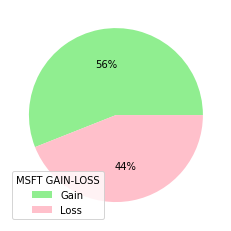

The Gain for Apple is:  56.34920634920635  whilst the Loss is:  43.65079365079365


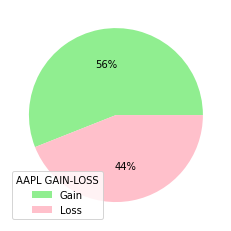

In [20]:
#MICROSOFT:

#COMPUTING THE GAIN-LOSS:
gain_msft = np.sum(np.array(Perf_return_msft) >= 0, axis=0) * 100 / np.size(Perf_return_msft)   #Finding the percentage of Days in which Microsoft is Gaining.
loss_msft = np.sum(np.array(Perf_return_msft) < 0, axis=0) * 100 / np.size(Perf_return_msft)    #Finding the percentage of Days in which Microsoft experience a Loss.
print("The Gain for Microsoft is: ", gain_msft, " whilst the Loss is: ", loss_msft)             #Printing out this two last results.

#DEFINE DATA:
data_msft = [np.rint(gain_msft), np.rint(loss_msft)]                                            #Defining the list with Gain and Loss to be added to the Pie Chart.

#PLOTTING THE PIE-CHART:
labels = ['Gain', 'Loss']                                                                       #Definng the Labels that will be used for the Chart.
colors = ['lightgreen', 'pink']                                                                 #Defining the colors to be used in the Pie Chart.
plt.pie(data_msft, colors = colors, autopct='%.0f%%')                                           #Plotting the Pie Chart.
plt.legend(labels, loc=3, title="MSFT GAIN-LOSS")                                               #Plotting out the Legend of the Chart.
plt.show()                                                                                      #Showing out the entire plot.


#APPLE:

#COMPUTING THE GAIN-LOSS:
gain_aapl = np.sum(np.array(Perf_return_aapl) >= 0, axis=0) * 100 / np.size(Perf_return_aapl)   #Finding the percentage of Days in which Apple is Gaining.
loss_aapl = np.sum(np.array(Perf_return_aapl) < 0, axis=0) * 100 / np.size(Perf_return_aapl)    #Finding the percentage of Days in which Microsoft experience a Loss.
print("The Gain for Apple is: ", gain_aapl, " whilst the Loss is: ", loss_aapl)                 #Printing out this two last results.

#DEFINE DATA:
data_aapl = [np.rint(gain_aapl), np.rint(loss_aapl)]                                            #Defining the list with Gain and Loss to be added to the Pie Chart. 

#PLOTTING THE PIE-CHART:
plt.pie(data_aapl, colors = colors, autopct='%.0f%%')                                           #Plotting the Pie Chart.
plt.legend(labels, loc=3, title="AAPL GAIN-LOSS")                                               #Plotting out the Legend of the Chart.
plt.show()                                                                                      #Showing out the entire plot.



### 2.2.2: IMPLEMENTATION OF A NON-PARAMETRIC BOOTSTRAP:

In order to implement a **Non-Parametric Bootstrap** we will need to follow a sort a procedure. First of all we will have to define our Functio Omega Hat, that we have proved analytically during the first requested point of the exercise (have a look at the pdf attached). From this, then, we will have to loop over the data we have generated and evaluate for the function Omega we have defined. We then proceed in plotting the Omega-Star. 

Then, we proceed on by answering to the two estimetes being asked: the **standard error** and **MSE** of the plug-in estimator $\widehat{\omega}$. The former is simply computed by applying the Standard Error funciton to the array "Boot_stat". The latter instead is computed with the formula: $$ MSE = Variance + Bias^2$$

RangeIndex(start=0, stop=2, step=1)
The Non-Parametric Estimate for the Standard Error is:  0.0722450067891011
The Non-Parametric Estimate for the Biased Squared is:  1.7712931935165114e-06
The Non-Parametric Estimate for the Variance is:  0.005219341005957264
The Non-Parametric Estimate for the Mean Square Errir is:  0.0052211122991507805


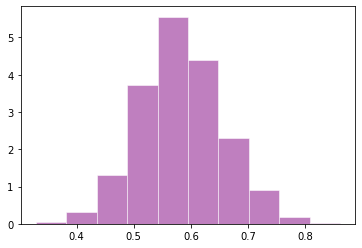

In [21]:
#CREATION OF A SUB-DATAFRAME:
yields_table=pd.DataFrame([Perf_return_msft,Perf_return_aapl]).T     #We first of all create a dataframe, containing the RoR Information for both the Stocks. Notice that, since we are 
                                                                     #passing to them directly the two arrays, we will obtain a dataframe of 252 columns and 2 rows only.
                                                                     #Since what we want is the converse, we will have to Transpose this Dataframe, in such a way to obtain that it is
                                                                     #a 252 rows x 2 columns Dataframe.
print(yields_table.columns)

#DEFINITION OF THE FUNCTION OMEGA HAT:
def omega(dataframe):                                                                    
    x = np.array(dataframe[0])                                       #Saving in "x" the results RoR values for Microsoft.
    y = np.array(dataframe[1])                                       #Saving in "y" the results RoR values for Apple.
    covariance = np.cov(x,y)[0,1]                                    #Defining and extrapolating the Covariance from the Covariance Matrix.
    omega=(np.var(y)-covariance)/(np.var(x)+np.var(y)-(2*covariance))#Compute the value of omega hat, namely our plug-in estimator.
    return omega                                                     #Returning our plug-in estimator.

#SETTING UP THE SEED:
np.random.seed(0)                                                    #Setting up the seed in order to guarantee the "Reproducibility", i.e. to give the possibility to run in other pcs
                                                                     #our code and to obtain always the same result.
                                                                     
#PRE-ALLOCATING AND INITIALIZE:
B = 1000                                                             #Setting up a-priori the size of the Bootstrap. Note that this is a critic part of our study. Indeed, we have to 
                                                                     #choose a trade-off: if we increse B, we will have also that the time increase linearly with it. On the other hand,
                                                                     #the lower the B, the less accurate and more variable our estimation is. 
                                                                     #We've choosen 1000, because it has been demonstrated by scientists that it is the best trade-off.
boot_stat = np.zeros(B)                                              #Allocate an array that will have the same length of our Bootstrap.
for b in range(B):
    x_boot       = yields_table.sample(n = len(yields_table), replace = True)   #Generate Data from our yields table. Note that this array of generated data will have the same length 
                                                                                #of the Bootstrap.
    boot_stat[b] = omega(x_boot)                                     #Evaluate the Statistics that I want, namely we apply the omega function precedently defined, and we apply it to the 
                                                                     #Bootstrap Sample. 
                                                                     
#PLOTTING OMEGA-STAR:
plt.hist(boot_stat, density = 1, facecolor='purple', edgecolor = 'white', alpha=0.5)    #Histogram that represents the omega star. Bootstrapped distribution of our plug-in estimator.

#COMPUTE THE NON-PARAMETRIC ESTIMATE OF THE STANDARD ERROR:
plug_in = omega(yields_table)                                        #Evaluate the Plug-in Estimator .
se = boot_stat.std()                                                 #Non-Parametric Bootstrap Estimate of the Standard Error for the plug-in estimator. 
print('The Non-Parametric Estimate for the Standard Error is: ',se)  #Print out the Standard Error Estimate.

#COMPUTE THE NON-PARAMETRIC ESTIMATE OF THE BIAS SQUARED:
bias2 = (boot_stat.mean() - plug_in)**2                              #Non-Parametric Bootstrap Estimate of the Bias^2 for the plug-in estimator.
print('The Non-Parametric Estimate for the Biased Squared is: ',bias2)#Print out the Bias Squared Estimate.

#COMPUTE THE NON-PARAMETRIC ESTIMATE OF THE VARIANCE:
var = boot_stat.var()                                                # Nonparametric Bootstrap Estimate of the Variance for the plug-in estimator.
print('The Non-Parametric Estimate for the Variance is: ',var)       #Print out the Variance Estimate.

#COMPUTE THE NON-PARAMETRIC ESTIMATE OF THE MSE:
mse = var + bias2                                                    # Nonparametric Bootstrap Estimate of the MSE for the plug-in estimator.
print('The Non-Parametric Estimate for the Mean Square Errir is: ',mse)#Print out the Bias MSE Estimate.